<a href="https://colab.research.google.com/github/GitHubMohar127/CALCULATOR/blob/main/Sentiment_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sentiment140' dataset.
Path to dataset files: /kaggle/input/sentiment140


In [2]:
import os

dataset_dir = path
print(f"Contents of the dataset directory ({dataset_dir}):")
for item in os.listdir(dataset_dir):
    print(item)


Contents of the dataset directory (/kaggle/input/sentiment140):
training.1600000.processed.noemoticon.csv


In [3]:
import pandas as pd

dataset_file_path = os.path.join(dataset_dir, 'training.1600000.processed.noemoticon.csv')
df = pd.read_csv(dataset_file_path, encoding='latin1')

print("Dataset loaded successfully. Here are the first 5 rows:")
display(df.head())

Dataset loaded successfully. Here are the first 5 rows:


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [5]:
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
print("Columns renamed successfully. Here are the first 5 rows with new column names:")
display(df.head())

Columns renamed successfully. Here are the first 5 rows with new column names:


,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   id      1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
df.rename(columns={'target': 'sentiment'}, inplace=True)
print("Column 'target' renamed to 'sentiment'. Here are the first 5 rows with the new column name:")
display(df.head())

Column 'target' renamed to 'sentiment'. Here are the first 5 rows with the new column name:


,sentiment,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [8]:
df['sentiment'] = df['sentiment'].replace(4, 1)
print("Values in 'sentiment' column mapped: 4 changed to 1. Here are the first 5 rows to verify:")
display(df.head())

Values in 'sentiment' column mapped: 4 changed to 1. Here are the first 5 rows to verify:


,sentiment,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [9]:
df.drop(columns=['id', 'date', 'flag', 'user'], inplace=True)
print("Columns 'id', 'date', 'flag', and 'user' dropped. Here are the first 5 rows of the cleaned DataFrame:")
display(df.head())

Columns 'id', 'date', 'flag', and 'user' dropped. Here are the first 5 rows of the cleaned DataFrame:


,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [10]:
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
sentiment    0
text         0
dtype: int64


**Reasoning**:
The subtask also requires checking for and handling duplicate values. Since there are no missing values, the next step is to check for duplicate rows in the DataFrame using `df.duplicated().sum()`.



In [11]:
print("Checking for duplicate rows:")
print(df.duplicated().sum())

Checking for duplicate rows:
16309


In [12]:
df.drop_duplicates(inplace=True)
print("Duplicate rows dropped. New DataFrame shape:")
print(df.shape)
print("Checking for duplicate rows after dropping:")
print(df.duplicated().sum())

Duplicate rows dropped. New DataFrame shape:
(1583690, 2)
Checking for duplicate rows after dropping:
0


#EDA

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk

print("Libraries imported successfully.")

Libraries imported successfully.


/tmp/ipython-input-2142460792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


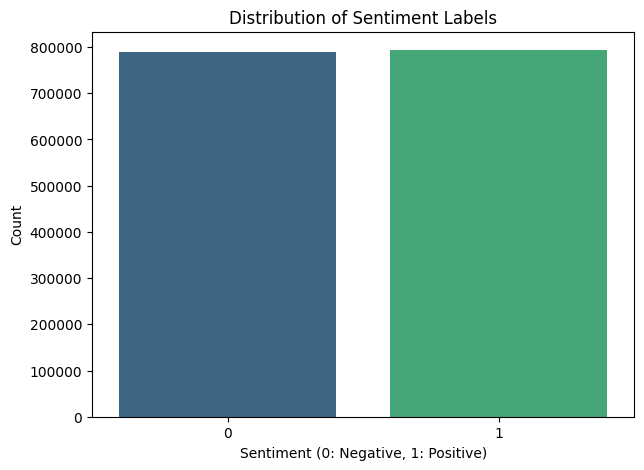

Bar chart showing sentiment distribution displayed.


In [14]:
plt.figure(figsize=(7, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()
print("Bar chart showing sentiment distribution displayed.")

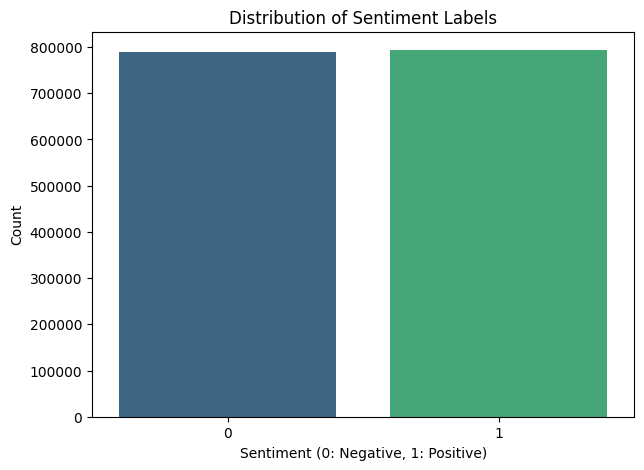

Bar chart showing sentiment distribution displayed.


In [15]:
plt.figure(figsize=(7, 5))
sns.countplot(x='sentiment', data=df, palette='viridis', hue='sentiment', legend=False)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()
print("Bar chart showing sentiment distribution displayed.")

In [16]:
df['text_length'] = df['text'].apply(len)
print("New column 'text_length' created. Here are the first 5 rows with the new column:")
display(df.head())

New column 'text_length' created. Here are the first 5 rows with the new column:


,sentiment,text,text_length
0,0,is upset that he can't update his Facebook by ...,111
1,0,@Kenichan I dived many times for the ball. Man...,89
2,0,my whole body feels itchy and like its on fire,47
3,0,"@nationwideclass no, it's not behaving at all....",111
4,0,@Kwesidei not the whole crew,29


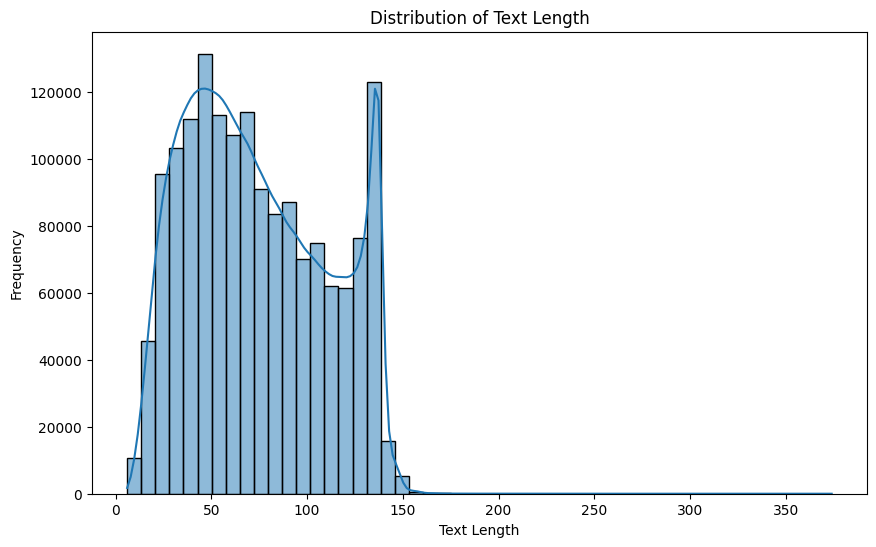

Histogram showing text length distribution displayed.


In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()
print("Histogram showing text length distribution displayed.")

In [18]:
negative_tweets = df[df['sentiment'] == 0]['text']
positive_tweets = df[df['sentiment'] == 1]['text']

print(f"Number of negative tweets: {len(negative_tweets)}")
print(f"Number of positive tweets: {len(positive_tweets)}")

Number of negative tweets: 790184
Number of positive tweets: 793506


In [19]:
negative_text = negative_tweets.str.cat(sep=' ')
positive_text = positive_tweets.str.cat(sep=' ')

print("Concatenated negative text length:", len(negative_text))
print("Concatenated positive text length:", len(positive_text))

Concatenated negative text length: 59942360
Concatenated positive text length: 59592084


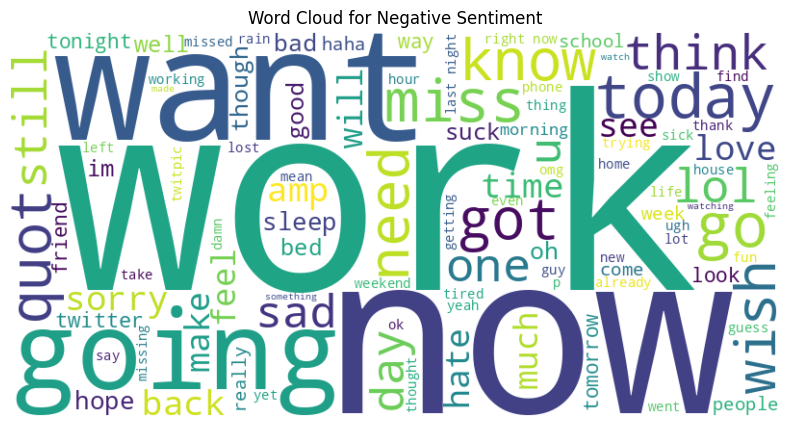

Word cloud for negative sentiment displayed.


In [20]:
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()
print("Word cloud for negative sentiment displayed.")

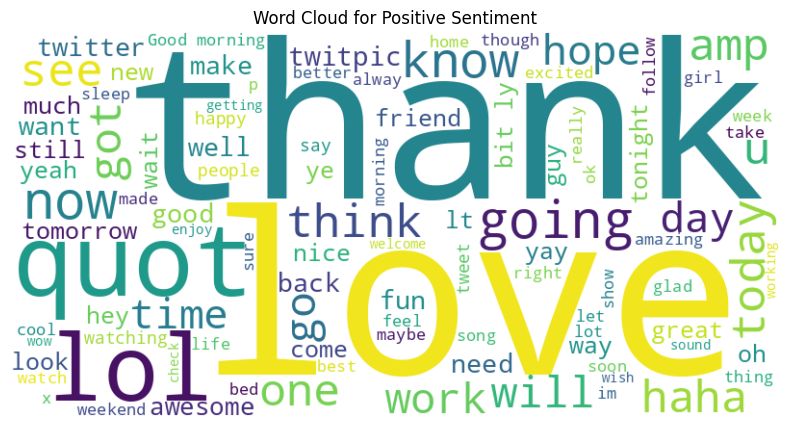

Word cloud for positive sentiment displayed.


In [21]:
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()
print("Word cloud for positive sentiment displayed.")

## Feature Engineering




In [22]:
import nltk
nltk.download('stopwords')
print("NLTK stopwords corpus downloaded.")

NLTK stopwords corpus downloaded.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
import string
from nltk.corpus import stopwords

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

print("Text preprocessing function defined.")

Text preprocessing function defined.


In [24]:
df['cleaned_text'] = df['text'].apply(preprocess_text)
print("Cleaned text stored in 'cleaned_text' column. Here are the first 5 rows with the new column:")
display(df.head())

Cleaned text stored in 'cleaned_text' column. Here are the first 5 rows with the new column:


,sentiment,text,text_length,cleaned_text
0,0,is upset that he can't update his Facebook by ...,111,upset cant update facebook texting might cry r...
1,0,@Kenichan I dived many times for the ball. Man...,89,kenichan dived many times ball managed save 50...
2,0,my whole body feels itchy and like its on fire,47,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",111,nationwideclass behaving im mad cant see
4,0,@Kwesidei not the whole crew,29,kwesidei whole crew


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
print("TfidfVectorizer imported and initialized.")

TfidfVectorizer imported and initialized.


In [26]:
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])
print(f"TF-IDF matrix created with shape: {X_tfidf.shape}")

TF-IDF matrix created with shape: (1583690, 843866)


## Model Building and Training




In [27]:
from sklearn.model_selection import train_test_split

X = X_tfidf
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set features shape: {X_train.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Test set features shape: {X_test.shape}")
print(f"Test set target shape: {y_test.shape}")

Training set features shape: (1266952, 843866)
Training set target shape: (1266952,)
Test set features shape: (316738, 843866)
Test set target shape: (316738,)


In [28]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(solver='liblinear', random_state=42, n_jobs=-1)
print("Logistic Regression model initialized.")

print("Training Logistic Regression model...")
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model initialized.
Training Logistic Regression model...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


Logistic Regression model trained successfully.


In [29]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
print("Multinomial Naive Bayes model initialized.")

print("Training Multinomial Naive Bayes model...")
nb_model.fit(X_train, y_train)
print("Multinomial Naive Bayes model trained successfully.")

Multinomial Naive Bayes model initialized.
Training Multinomial Naive Bayes model...
Multinomial Naive Bayes model trained successfully.


## Model Evaluation and Selection



In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Evaluation metrics and ConfusionMatrixDisplay imported successfully.")

Evaluation metrics and ConfusionMatrixDisplay imported successfully.


In [31]:
y_pred_log_reg = log_reg_model.predict(X_test)
print("Predictions for Logistic Regression model generated.")

Predictions for Logistic Regression model generated.


In [32]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")

Logistic Regression Model Evaluation:
Accuracy: 0.7875
Precision: 0.7754
Recall: 0.8135
F1-Score: 0.7940


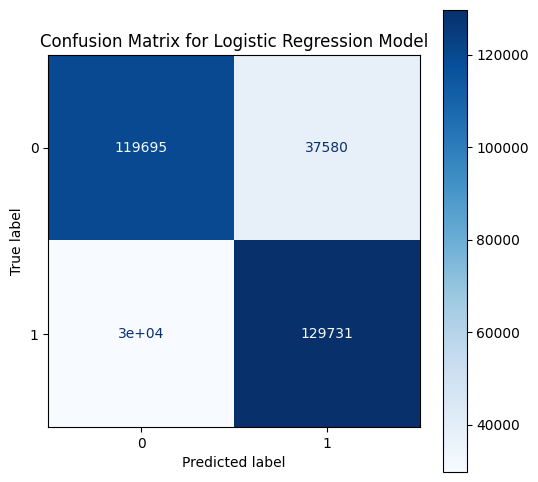

Confusion matrix for Logistic Regression model displayed.


In [33]:
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_reg, cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for Logistic Regression Model')
plt.show()
print("Confusion matrix for Logistic Regression model displayed.")

In [34]:
y_pred_nb = nb_model.predict(X_test)
print("Predictions for Multinomial Naive Bayes model generated.")

Predictions for Multinomial Naive Bayes model generated.


In [35]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Multinomial Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")

Multinomial Naive Bayes Model Evaluation:
Accuracy: 0.7638
Precision: 0.7891
Recall: 0.7245
F1-Score: 0.7554
